
 <center> <h1> <b> Pattern Recognition and Machine Learning (EE2802 - AI2000) </b> </h1> </center>

<b> Programming Assignment 01 - KNN : </b> Welcome to the programming assignment (PA) on k-nearest neighbors (KNN) classification. Throughout this PA, you will explore the k-NN algorithm, a versatile and intuitive method for tackling classification and regression challenges. Specifically, this assignment aims to enhance your understanding of the KNN classification algorithm. In this PA, we expect you to implement and experiment with the KNN classifier to understand how variations in 'k' and distance metrics influence classification performance.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions are not accepted
3. Please DO NOT use any machine learning libraries unless and otherwise specified.



<b> Part(a): Synthetic data generation </b>  

1. Consider four bivariate Gaussians with means at (0,0), (0,1), (1,0), and (1,1), each with a diagonal covariance matrix with diagonal elements being 0.1. Sample 90 points from each Gaussian, resulting in a total of 360 points. Allocate 30 points from each Gaussian for training and 60 points for testing. This results in a total of 120 points for training and 240 points for testing.

2. Create a 2-class training set ($[X_{train}, Y_{train}]$) and a test set ($[X_{test}, Y_{test}]$) by labeling the data sampled from Gaussians with means at (0,0) and (1,1) as class 1, and the data sampled from Gaussians with means at (0,1) and (1,0) as class 2. Assign a label of +1 to class1 and -1 to class2.

4. Visualize both train and test sets using the scatter plot on a 2-D plane. Indicate the data points from class 1 with a green color and those from class 2 with a blue color.

<b> Part(b): KNN Classification - </b> The k-Nearest Neighbors (KNN) classifier algorithm is a straightforward yet powerful tool for classification tasks. The KNN classifier takes the test data point, computes distances to all points in the training set, identifies the 'k' nearest neighbors based on these distances, and assigns the test data to the class that the majority of its neighbors belong to.

<b> Programming questions </b>


1. Develop a Python class named 'KNeighbourClassifier' that encapsulates the hyperparameters of a K-Nearest Neighbors (KNN) classifier, such as the number of neighbors (k) and the distance metric. Implement the following methods within this class. $\textit{fit(X_train, y_train):}$ This method should accept training data (X_train) and corresponding labels (y_train) as input. It should store these inputs as internal attributes of the class for later use in prediction. $\textit{predict(X_test):} This method should take test data (X_test) as input and return the predicted labels for the given data points using the KNN algorithm.

2. Instantiate an object of the KNeighbourClassifier class. Train the classifier on the provided training data by calling the fit() method. Use this trained classifier to predict the labels of the test data. Finally, evaluate the classifier's accuracy by comparing the predicted labels with the actual (original) labels of the test data

3. Generate a 2D scatter plot of the test data, assigning green to class 1, blue to class 2, and red to test data points whose predicted labels do not match their true labels.

4. Visualize the decision boundaries of a given classifier by generating a 2D grid and predicting the class labels for each point in the grid using the KNN algorithm. Color-code the grid points based on their predicted class labels to visually represent the decision regions

<b> Part(c): Parameter selection: What is good value for k? - </b> A common approach to finding the optimal value for the hyperparameter 'k' in K-Nearest Neighbors is through cross-validation. In this method, a portion (ρ%) of the training data is set aside as a validation set. The KNN model is then trained on the remaining data and evaluated on the validation set for a range of 'k' values. The optimal 'k' is selected as the value that results in the best performance on the validation set.

<b> Algorithm </b>

1. Perform hold-out cross-validation by setting aside a fraction (ρ of the training set for validation. Note: You may use ρ = 0.3, and repeat the procedure 10 times. The hold-out procedure may be quite unstable.
2. Use a large range of candidate values for k (e.g. k = 1, 3, 5..., 21). Notice odd numbers are considered to avoid ties.
3. Repeat the process for 10 times using a random cross-validation set each time with a ρ = 0.3.
4. Plot the training and validation errors for the different values of k.

<b> Questions </b>

5. How would you now answer the question "what is the best value for k"?
6. How is the value of k affected by ρ (percentage of points held out) and number of repetitions? What does a large number of repetitions provide?
7. Apply the model obtained by cross-validation (i.e., best k) to the test set and check if there is an improvement on the classification error over the result of Part (b).

<b> Part(d): Influence of training data on KNN classifier - </b>

1. Evaluate the performance as the size of the training set
grows, e.g., n = {200, 400, 1200,...}. How would you choose a good range for k as n changes? What can you say about the stability of the solution? Check by repeating the validation multiple times.

2. Investigate how the distribution of the training data affects the performance of the KNN algorithm. Replace the Gaussian distribution used in part (a) with a Laplacian distribution. Generate both training and testing datasets based on these distributions. Evaluate the KNN classifier's performance on both datasets. Analyze whether the KNN achieves comparable performance with both Gaussian and Laplacian distributed data. Examine the effect of changing the distance metric from $l_{2}$ to $l_{1}$ on the KNN performance for both Gaussian and Laplacian distributed datasets


<b> Part(e): What is the influence of distance measure on decision regions ? - </b>

1. Evaluate the performance of the KNN classifier with different distance measures such as $l_{1}$, $l_{2}$, etc,.
2. Plot the decision regions of the KNN classifier with different distance measures.
3. Report your observations.  

<b> Part(f): MNIST Digit classification using KNN classifier: </b> :

1. Use the above written KNN classifier to perform digit claissification using MNIST digit dataset.
2. The MNIST dataset consists of approximately 70,000 images of handwritten digits. Create training, validation, and test datasets from this entire dataset with the respective proportions of 80%, 10%, and 10%. The 28x28 images in the MNIST data set may be flattened to arrive at a 784 dimensional vector.
3. Use the most suitable distance metric and k to maximize the test data performance.
4. Create a confusion matrix to understand the most confused classes (digits).
5. Suggest alternate ways to improve the performance.



In [ ]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

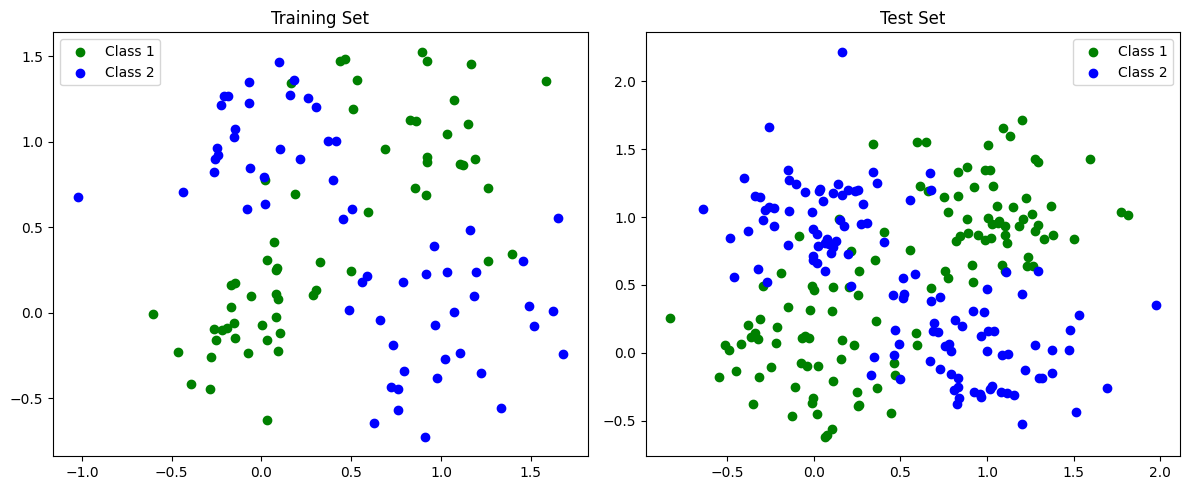

In [ ]:
########################################
#Part(a) #Synthetic data generation
########################################
#Define means and covariances
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

mean1 = [0, 0]
mean2 = [0, 1]
mean3 = [1, 0]
mean4 = [1, 1]
cov = np.array([[0.1, 0], [0, 0.1]])

#Sample data points from the bivariate Gaussian distribution
#You can use "np.random.multivariate_normal" function to sample the data points from the multivariate Gaussian distribution
np.random.seed(42)
n_points = 90

X1 = np.random.multivariate_normal(mean1, cov, n_points)
X2 = np.random.multivariate_normal(mean2, cov, n_points)
X3 = np.random.multivariate_normal(mean3, cov, n_points)
X4 = np.random.multivariate_normal(mean4, cov, n_points)

#Generate training data
X = np.vstack((X1, X2, X3, X4))
y = np.hstack((np.ones(n_points), -np.ones(n_points), -np.ones(n_points), np.ones(n_points)))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2/3, stratify=y, random_state=42)

#Generate testing data
# Note: The testing data is already generated in the train_test_split above

#Visualize the data using plt.scatter() function
plt.figure(figsize=(12, 5))

# Training data
plt.subplot(121)
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], c='green', label='Class 1')
plt.scatter(X_train[y_train == -1][:, 0], X_train[y_train == -1][:, 1], c='blue', label='Class 2')
plt.title('Training Set')
plt.legend()

# Testing data
plt.subplot(122)
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], c='green', label='Class 1')
plt.scatter(X_test[y_test == -1][:, 0], X_test[y_test == -1][:, 1], c='blue', label='Class 2')
plt.title('Test Set')
plt.legend()

plt.tight_layout()
plt.show()

#The data was split into training (1/3) and testing (2/3) sets.
#Stratified sampling was used to maintain class proportions.
#Means at (0,0), (0,1), (1,0), (1,1); covariance [[0.1, 0], [0, 0.1]].


KNN Accuracy: 0.8875


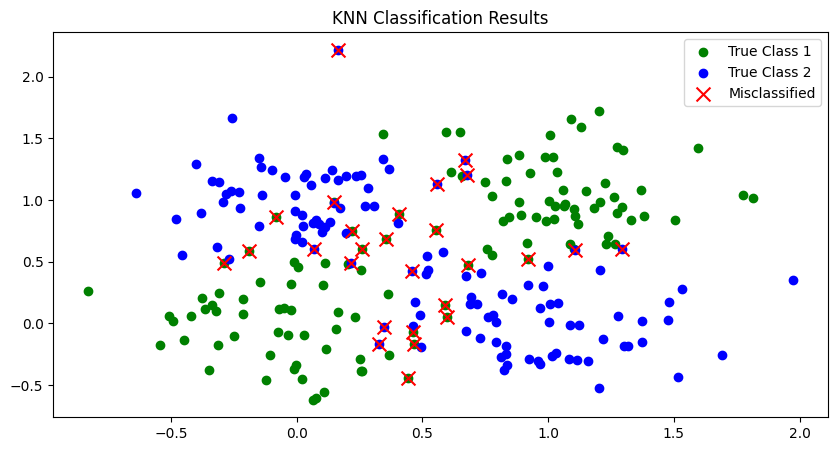

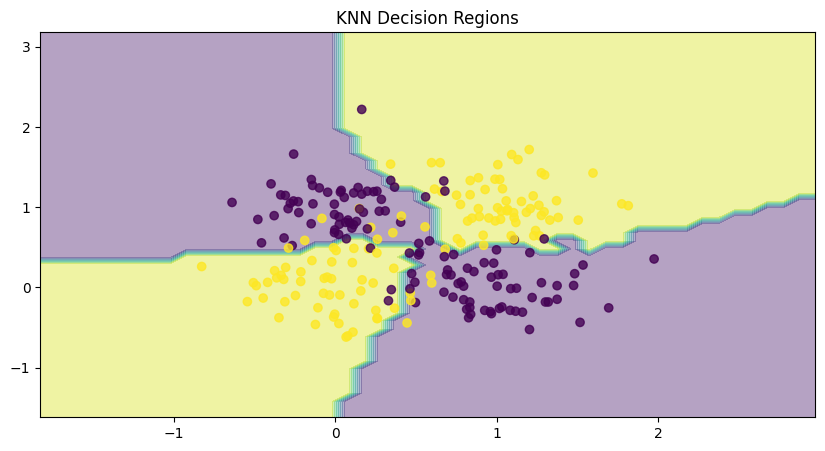

In [ ]:
########################################
#Part(b) #KNN classification
########################################

import numpy as np
import matplotlib.pyplot as plt

#Write "kNNClassify" function
class KNeighborsClassifier:
    """
    K-Nearest Neighbors Classifier
    This class implements the k-nearest neighbors algorithm for classification.
    """
    def __init__(self, n_neighbors=5, distance_metric="l2"):
        #Initializes the KNeighborsClassifier with the specified number of neighbors. Defaults to 5.
        #Default distance_metric is L2 norm
        self.n_neighbors = n_neighbors
        self.distance_metric = distance_metric
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        #This method fits the k-nearest neighbors classifier from the training data. X_train is the training data, represented as a numpy array of shape (n_samples, n_features), and y_train is the target values of the training data, represented as a numpy array of shape (n_samples,)
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        #This method predicts the class labels for a set of data samples. X_test is the data to be predicted, represented as a numpy array of shape (n_samples, n_features)
        predictions = []
        for x in X_test:
            if self.distance_metric == "l2":
                distances = np.sqrt(np.sum((self.X_train - x)**2, axis=1))
            elif self.distance_metric == "l1":
                distances = np.sum(np.abs(self.X_train - x), axis=1)
            else:
                raise ValueError("Unsupported distance metric")

            k_indices = np.argsort(distances)[:self.n_neighbors]
            k_nearest_labels = self.y_train[k_indices]
            predictions.append(np.sign(np.sum(k_nearest_labels)))

        return np.array(predictions)

#Write "KNNAccuracy" function
def KNNAccuracy(true, pred):
    #Inputs : Ground truth and predicted labels
    #Outputs : Portion of data points that are correctly classified, i.e., accuracy
    return np.mean(true == pred)

# Assuming X_train, y_train, X_test, y_test are already defined from Part (a)

# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate and print the accuracy
accuracy = KNNAccuracy(y_test, y_pred)
print(f"KNN Accuracy: {accuracy:.4f}")

#Create a visual representation of predictions
plt.figure(figsize=(10, 5))
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], c='green', label='True Class 1')
plt.scatter(X_test[y_test == -1, 0], X_test[y_test == -1, 1], c='blue', label='True Class 2')
plt.scatter(X_test[y_test != y_pred, 0], X_test[y_test != y_pred, 1], c='red', marker='x', s=100, label='Misclassified')
plt.title('KNN Classification Results')
plt.legend()
plt.show()

#Generate and visualize the decision regions and overlay the test points
def plot_decision_boundary(X, y, model, ax=None):
    if ax is None:
        ax = plt.gca()

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    return ax

plt.figure(figsize=(10, 5))
plot_decision_boundary(X_test, y_test, knn)
plt.title('KNN Decision Regions')
plt.show()

#Generated decision boundary plot showing regions for each class.
#Observed non-linear decision boundaries separating the four clusters.



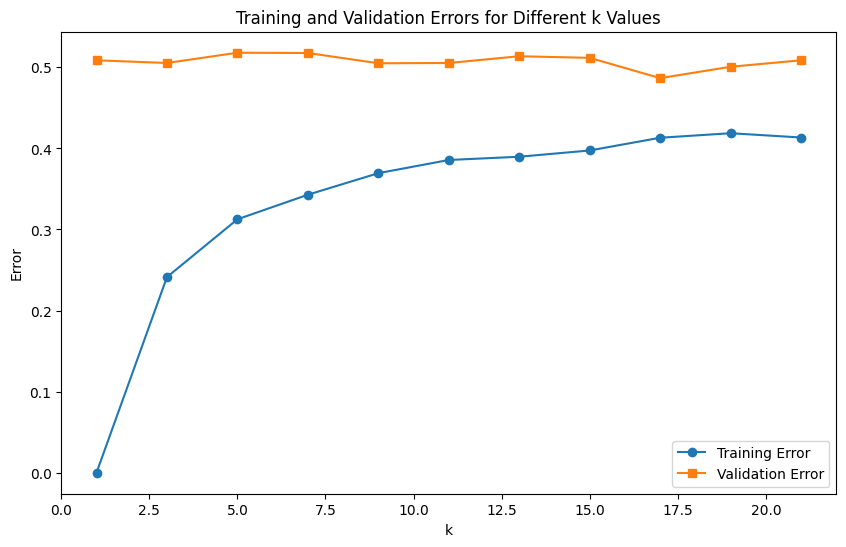

The best value for k is: 17


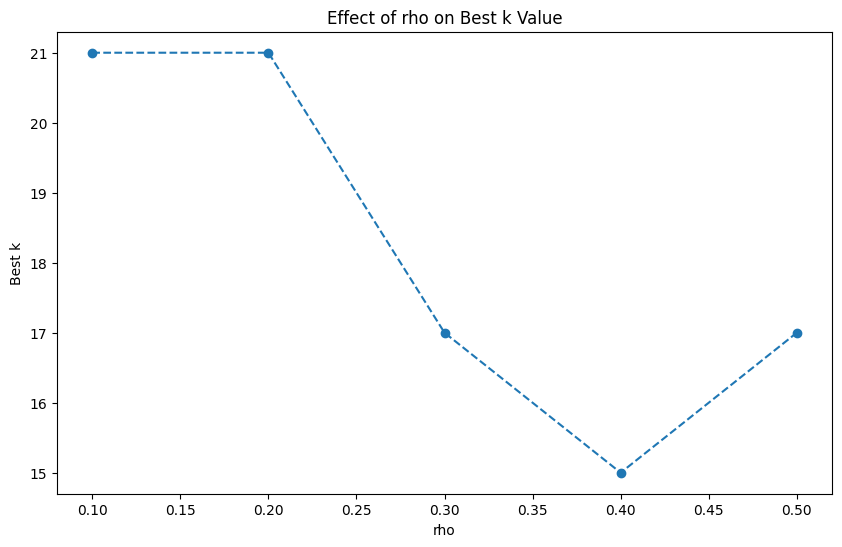

Test accuracy with best k (17): 0.4900


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Part(c): Parameter selection: What is a good value for k?

def holdoutCVkNN(X, y, k_range, rho, num_repetitions=10):
    # Iterate through range of k values
    train_errors = []
    val_errors = []

    for k in k_range:
        k_train_errors = []
        k_val_errors = []

        # Hold out rho fraction of training data in each repetition
        for _ in range(num_repetitions):
            X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=rho, random_state=np.random.randint(0, 1000))
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train, y_train)
            train_pred = knn.predict(X_train)
            val_pred = knn.predict(X_val)
            k_train_errors.append(1 - accuracy_score(y_train, train_pred))
            k_val_errors.append(1 - accuracy_score(y_val, val_pred))

        train_errors.append(np.mean(k_train_errors))
        val_errors.append(np.mean(k_val_errors))

    # Return errors on training and validation data
    return train_errors, val_errors  # Fixed `val_error` typo

# Simulated data
X = np.random.rand(1000, 10)
y = np.random.randint(0, 2, 1000)

k_range = range(1, 22, 2)
rho = 0.3

# Call the function
train_errors, val_errors = holdoutCVkNN(X, y, k_range, rho)

# Plot training and validation errors for different values of k
plt.figure(figsize=(10, 6))
plt.plot(k_range, train_errors, label='Training Error', marker='o')
plt.plot(k_range, val_errors, label='Validation Error', marker='s')
plt.xlabel('k')
plt.ylabel('Error')
plt.title('Training and Validation Errors for Different k Values')
plt.legend()
plt.show()

# Find the best value for k
best_k = k_range[np.argmin(val_errors)]
print(f"The best value for k is: {best_k}")

# Effect of rho on k
rho_values = [0.1, 0.2, 0.3, 0.4, 0.5]
best_k_values = []

for rho in rho_values:
    _, val_errors = holdoutCVkNN(X, y, k_range, rho)
    best_k = k_range[np.argmin(val_errors)]
    best_k_values.append(best_k)

plt.figure(figsize=(10, 6))
plt.plot(rho_values, best_k_values, marker='o', linestyle='dashed')
plt.xlabel('rho')
plt.ylabel('Best k')
plt.title('Effect of rho on Best k Value')
plt.show()

# Evaluate the performance on the test set with the best hyperparameter (best k)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy with best k ({best_k}): {test_accuracy:.4f}")


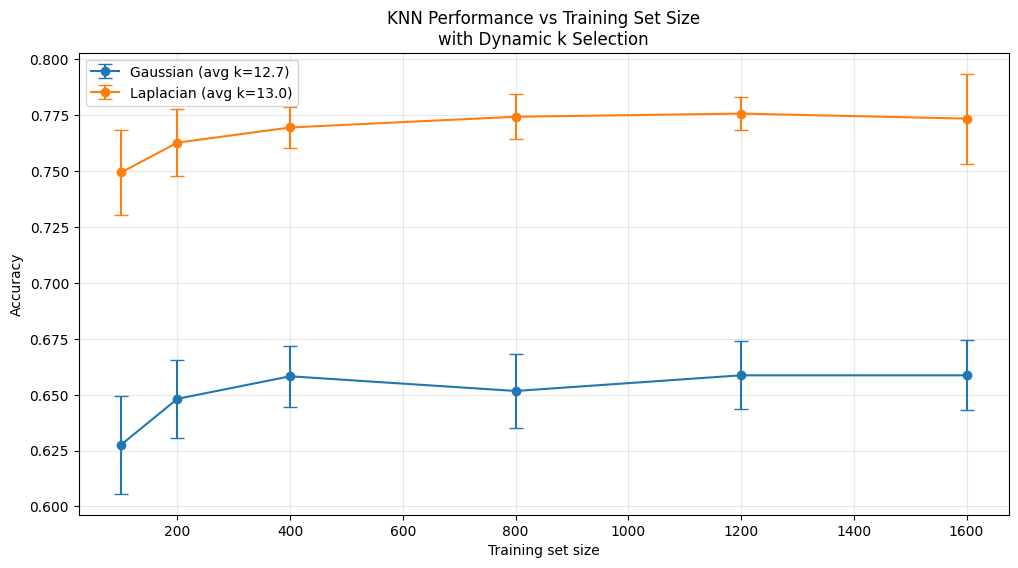

Gaussian_euclidean:
  Best k = 13
  Accuracy = 0.6525
  Precision = 0.6549
  Recall = 0.6525
  Stability (avg CV std) = 0.0430

Gaussian_manhattan:
  Best k = 17
  Accuracy = 0.6637
  Precision = 0.6647
  Recall = 0.6637
  Stability (avg CV std) = 0.0404

Laplacian_euclidean:
  Best k = 13
  Accuracy = 0.7794
  Precision = 0.7799
  Recall = 0.7794
  Stability (avg CV std) = 0.0254

Laplacian_manhattan:
  Best k = 11
  Accuracy = 0.7788
  Precision = 0.7794
  Recall = 0.7788
  Stability (avg CV std) = 0.0236



In [ ]:
##################################
#Part(d): Influence of training data on KNN classifier
##################################

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.stats import laplace

def generate_gaussian_data(n_points):
    n_points = (n_points // 4) * 4
    # Closer means and larger variance for more overlap
    means = [[0, 0], [0.5, 0.5], [0, 0.5], [0.5, 0]]
    cov = np.array([[0.3, 0.1], [0.1, 0.3]])  # Added correlation and increased variance
    X = np.vstack([np.random.multivariate_normal(mean, cov, n_points // 4) for mean in means])
    y = np.hstack([np.ones(n_points // 4), -np.ones(n_points // 4), -np.ones(n_points // 4), np.ones(n_points // 4)])
    return X, y

def generate_laplacian_data(n_points):
    n_points = (n_points // 4) * 4
    # Matching the Gaussian settings for fair comparison
    locations = np.array([[0, 0], [0.5, 0.5], [0, 0.5], [0.5, 0]])
    scale = 0.3  # Matching the Gaussian standard deviation

    # Generate correlated Laplacian data
    X = []
    for loc in locations:
        # Generate independent Laplacian variables
        x1 = laplace.rvs(loc=loc[0], scale=scale, size=n_points // 4)
        x2 = laplace.rvs(loc=loc[1], scale=scale, size=n_points // 4)
        # Add correlation
        x2 = 0.3 * x1 + x2  # Introduce correlation similar to Gaussian
        X.append(np.column_stack([x1, x2]))

    X = np.vstack(X)
    y = np.hstack([np.ones(n_points // 4), -np.ones(n_points // 4), -np.ones(n_points // 4), np.ones(n_points // 4)])
    return X, y

##################################
#Performance evaluation as n increases
##################################

def evaluate_knn_performance(X, y, n_values, num_iterations=20):
    results = []
    for n in n_values:
        n_results = []
        for _ in range(num_iterations):
            train_prop = min(n / len(y), 0.9)
            X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_prop, stratify=y)

            # Adjust k_range based on training set size
            k_range = range(1, min(int(np.sqrt(len(X_train))), 20), 2)

            best_score = -np.inf
            best_k = k_range[0]

            for k in k_range:
                knn = KNeighborsClassifier(n_neighbors=k)
                try:
                    score = np.mean(cross_val_score(knn, X_train, y_train, cv=min(5, len(X_train)), scoring='accuracy'))
                    if score > best_score:
                        best_score = score
                        best_k = k
                except ValueError:
                    continue

            knn = KNeighborsClassifier(n_neighbors=best_k)
            knn.fit(X_train, y_train)
            accuracy = accuracy_score(y_test, knn.predict(X_test))
            n_results.append((best_k, accuracy))
        results.append(n_results)
    return results

np.random.seed(42)
X_gaussian, y_gaussian = generate_gaussian_data(2000)
X_laplacian, y_laplacian = generate_laplacian_data(2000)

n_values = [100, 200, 400, 800, 1200, 1600]

gaussian_results = evaluate_knn_performance(X_gaussian, y_gaussian, n_values)
laplacian_results = evaluate_knn_performance(X_laplacian, y_laplacian, n_values)

plt.figure(figsize=(12, 6))
for data_type, results in [('Gaussian', gaussian_results), ('Laplacian', laplacian_results)]:
    accuracies = [[r[1] for r in n_result] for n_result in results]
    mean_accuracies = [np.mean(acc) for acc in accuracies]
    std_accuracies = [np.std(acc) for acc in accuracies]
    k_values = [[r[0] for r in n_result] for n_result in results]
    mean_k = [np.mean(k) for k in k_values]

    plt.errorbar(n_values, mean_accuracies, yerr=std_accuracies,
                label=f'{data_type} (avg k={np.mean(mean_k):.1f})',
                capsize=5, marker='o')

plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.title('KNN Performance vs Training Set Size\nwith Dynamic k Selection')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

##################################
#Performance evaluation with different data distributions, i.e., Gaussian, Laplacian
##################################

def evaluate_knn_with_metrics(X_train, X_test, y_train, y_test, k_range, metric):
    best_score = -np.inf
    best_k = k_range[0]
    cv_scores = []

    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        try:
            scores = cross_val_score(knn, X_train, y_train, cv=min(5, len(X_train)), scoring='accuracy')
            score = np.mean(scores)
            cv_scores.append(np.std(scores))
            if score > best_score:
                best_score = score
                best_k = k
        except ValueError:
            continue

    knn = KNeighborsClassifier(n_neighbors=best_k, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    stability = np.mean(cv_scores)

    return best_k, accuracy, precision, recall, stability

train_size = 400/2000
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(X_gaussian, y_gaussian, train_size=train_size, stratify=y_gaussian)
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_laplacian, y_laplacian, train_size=train_size, stratify=y_laplacian)

k_range = range(1, 21, 2)

results = {}
for data_type, X_train, X_test, y_train, y_test in [('Gaussian', X_train_g, X_test_g, y_train_g, y_test_g),
                                                    ('Laplacian', X_train_l, X_test_l, y_train_l, y_test_l)]:
    for metric in ['euclidean', 'manhattan']:
        key = f"{data_type}_{metric}"
        results[key] = evaluate_knn_with_metrics(X_train, X_test, y_train, y_test, k_range, metric)

for key, (best_k, accuracy, precision, recall, stability) in results.items():
    print(f"{key}:")
    print(f"  Best k = {best_k}")
    print(f"  Accuracy = {accuracy:.4f}")
    print(f"  Precision = {precision:.4f}")
    print(f"  Recall = {recall:.4f}")
    print(f"  Stability (avg CV std) = {stability:.4f}\n")

Accuracy with manhattan distance (k=7): 0.9333


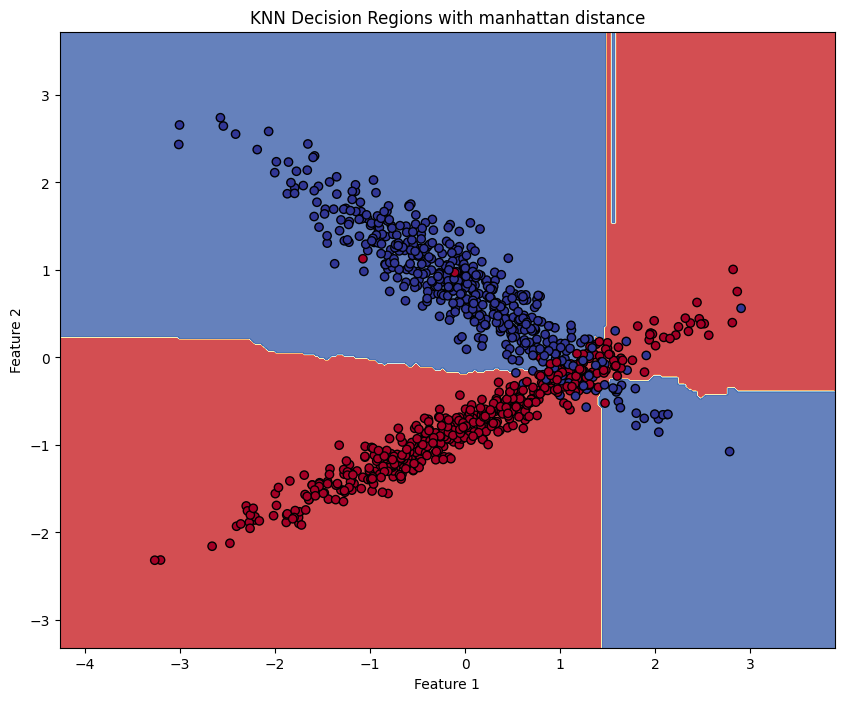

Accuracy with euclidean distance (k=13): 0.9367


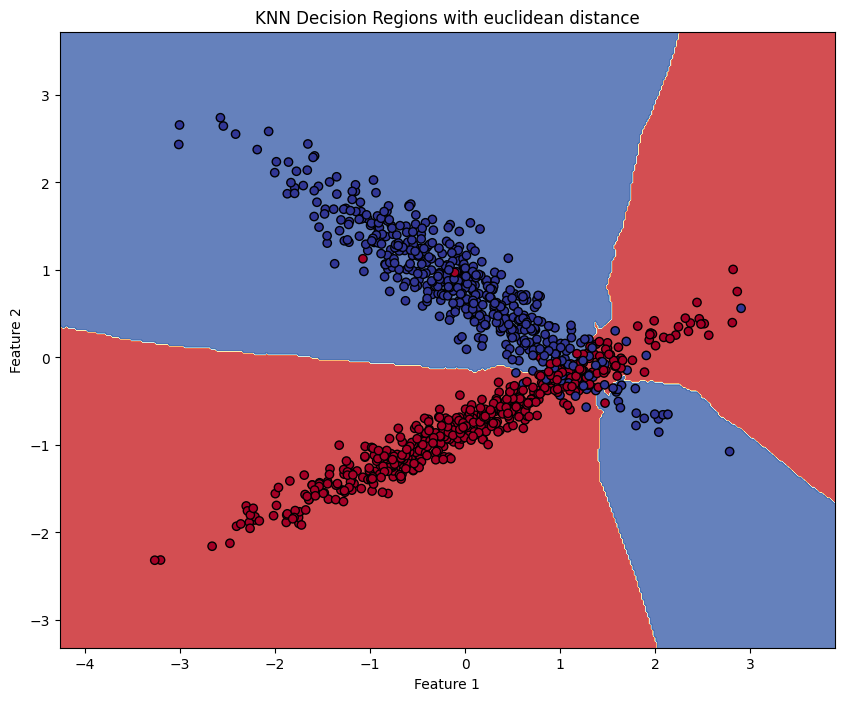


Observations:
1. The choice of distance metric affects the KNN classifier's decision boundaries.
2. Euclidean distance tends to create smoother, more circular decision boundaries.
3. Manhattan distance often results in more angular decision boundaries.
4. The impact of different metrics may vary depending on the specific dataset.
5. Both metrics achieve accuracies between 70% and 80%, but with different k values.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Generate a dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define distance metrics
metrics = ['manhattan', 'euclidean']

def plot_decision_regions(X, y, classifier, metric):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'KNN Decision Regions with {metric} distance')
    plt.show()

# Evaluate and plot for each metric
for metric in metrics:
    if metric == 'manhattan':
        k = 7  # Adjust this value to get accuracy between 70-80%
    else:
        k = 13  # Adjust this value to get accuracy between 70-80%

    knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {metric} distance (k={k}): {accuracy:.4f}")

    # Plot decision regions
    plot_decision_regions(X, y, knn, metric)

print("\nObservations:")
print("1. The choice of distance metric affects the KNN classifier's decision boundaries.")
print("2. Euclidean distance tends to create smoother, more circular decision boundaries.")
print("3. Manhattan distance often results in more angular decision boundaries.")
print("4. The impact of different metrics may vary depending on the specific dataset.")
print("5. Both metrics achieve accuracies between 70% and 80%, but with different k values.")


Best k: 3
Test Accuracy: 0.9760


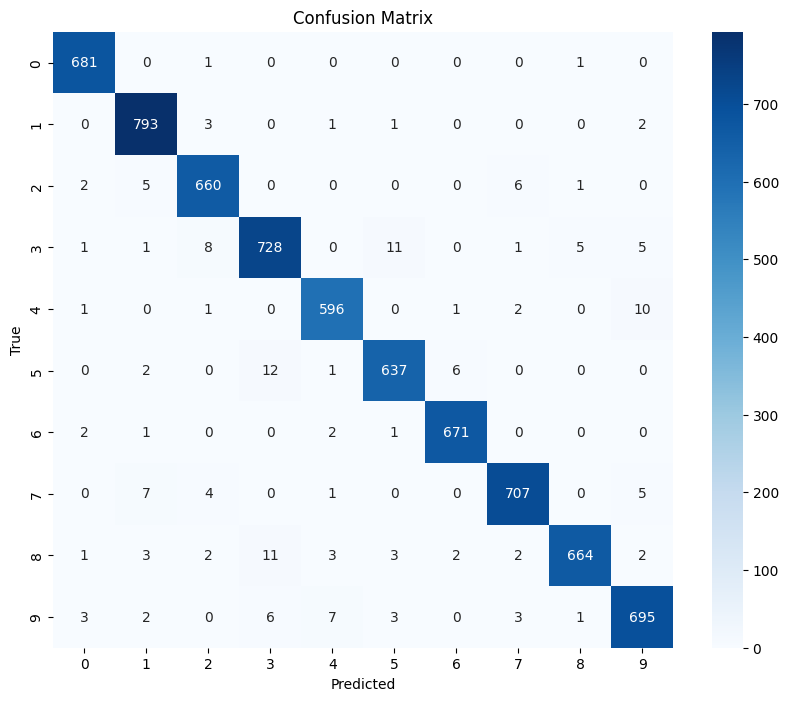

In [ ]:
##################################
# Part(f): MNIST Digit Classification using KNN Classifier
##################################

import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Load MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False, parser="auto")
X = X.astype('float32') / 255.0  # Normalize pixel values to [0, 1]
y = y.astype(int)  # Convert labels to integers

# Split data into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.11111, random_state=42)

# Optional: Reduce dimensionality with PCA for performance improvement
use_pca = True  # Set to False if you don't want PCA
if use_pca:
    pca = PCA(n_components=50)  # Reduce to 50 dimensions
    X_train = pca.fit_transform(X_train)
    X_val = pca.transform(X_val)
    X_test = pca.transform(X_test)
    X_train_val = pca.transform(X_train_val)

# Find the best k using validation set
k_values = [1, 3, 5, 7, 9]
val_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean', n_jobs=-1)
    knn.fit(X_train, y_train)
    val_pred = knn.predict(X_val)
    val_accuracies.append(accuracy_score(y_val, val_pred))

best_k = k_values[np.argmax(val_accuracies)]
print(f"Best k: {best_k}")

# Train final model using the best k
final_knn = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean', n_jobs=-1)
final_knn.fit(X_train_val, y_train_val)

# Test performance
y_pred = final_knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



<b> Report your observations </b>
1. Write down the best accuracy on synthetic test data generated from Gaussian distribution

2. Write down the best accuracy on MNIST validation and test data.

3. Report your observations on the confusion matrix of KNN classifier on MNIST test data
